## Ejercicio integrador

Lanzamos un conjunto de $N$ dardos sobre un tablero circular de radio $r = 0.5$ metros. El tablero está perfectamente contenido en un cuadrado de lado $l = 2r$. Como tenemos muy mala puntería, los dardos se distribuyen al azar sobre el tablero y el cuadrado que lo contiene. Notar que la probabilidad de que un dardo caiga en el tablero es proporcional al área del tablero divido el area total del cuadrado. Si llamamos $N_{tablero}$ a los dardos que caen en el tablero, tenemos que

$\frac{N_{tablero}}{N} \approx \frac{A_{tablero}}{A_{cuadrado}}$

Reemplazando en las fórmulas anterior por el área de un círculo con $r = 0.5$ y un cuadrado de lado $l = 1$, obtenemos que

$\frac{N_{tablero}}{N} \approx \frac{\pi}{4}$

**Fórmulas útiles**
1. Área del cuadrado: $l^2$
2. Área del círculo: $\pi r^2$
3. Un punto de coordenadas $(x,y)$ está dentro de un círculo de centro $(x_0,y_0)$ y radio $r$ si se cumple la relacion $(x - x_0)^2 + (y - y_0)^2 < r^2$

**CONSIGNA**: 
1. Implementar una rutina que calcule $\pi$ mediante este método. Es decir, simulando que tiramos dardos al azar sobre un tablero redondo de radio $r = 0.5$ contenido en un cuadrado de lado $l = 1$
2. Hacer un gráfico representativo del tablero, el cuadrado y de los dardos lanzados.
3. Hacer un gráfico del error en la estimación de $\pi$ a medida que aumenta el número de dardos lanzados. Para googlear: ¿qué es un gráfico en escala logarítmica y cómo lo podemos hacer con matplotlib?

**Pistas para la implementación**

1. Cada dardo tiene una coordenada horizontal $x$ y vertical $y$ en el cuadrado. ¿Cómo generarían coordenadas de dardos al azar?¿Qué es una distribución uniforme?
2. Dada una coordenada $x,y$ de un dardo, ¿cómo decidirían si el dardo está dentro o fuera del círculo?
3. No hay una única forma de implementar el problema. Pero, si su implementación tiene muchos *for* loops, ¿hay una forma de optimizarla?
4. Por último: googlear!


Para una explicación más entretenida de lo que está pasando, pueden ver este [video](https://www.youtube.com/watch?v=M34TO71SKGk):

In [1]:
import numpy as np

Generamos las tiradas de los dardos

In [19]:
N = 100000
coor = np.random.rand(N,2)
print(coor.shape)

(100000, 2)


In [20]:
coor

array([[0.60328251, 0.96708774],
       [0.70975746, 0.56609851],
       [0.54287233, 0.62441322],
       ...,
       [0.34016332, 0.84646182],
       [0.93172573, 0.87585836],
       [0.14554757, 0.63502606]])

Seleccionamos aquellos que caen dentro del círculo

In [21]:
adentro = np.sqrt((coor[:,0] - 0.5)**2 + (coor[:,1] - 0.5)**2) < 0.5

Contamos cuántos caen adentro del círculo y despejamos para obtener $\pi$

In [22]:
print(4*adentro.sum()/N)

3.14156


In [23]:
# del(coor)

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(coor, columns=['x','y'])

In [27]:
df.head()

,x,y
0,0.603283,0.967088
1,0.709757,0.566099
2,0.542872,0.624413
3,0.441208,0.379589
4,0.990121,0.707667


In [29]:
def adentro(x, y, r = 0.5):
    a = 0
    x1 = (x - 0.5)**2
    y1 = (y - 0.5)**2
    if np.sqrt(x1 + y1) < 0.5:
        a = 1
    return a

In [31]:
adentro(0.2, 0.05)

0

In [32]:
df['adentro'] = df.apply(lambda row: adentro(row['x'], row['y']), axis=1)

In [33]:
df['x'] = df['x'] - 0.5
df['y'] = df['y'] - 0.5

In [34]:
df.head(5)

,x,y,adentro
0,0.103283,0.467088,1
1,0.209757,0.066099,1
2,0.042872,0.124413,1
3,-0.058792,-0.120411,1
4,0.490121,0.207667,0


In [35]:
print(4 * df.adentro.sum() / df.adentro.count())

3.14156


In [36]:
import seaborn as sns

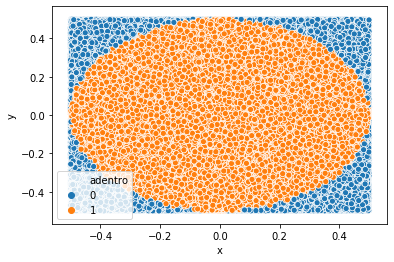

In [37]:
sns.scatterplot(x='x', y='y', hue='adentro', data=df)